In [16]:
timeData = [[1.088, 1.094, 1.121], [1.543, 1.562, 1.560], [1.980, 1.857, 1.863], [2.198, 2.185, 2.187]]
heightData = [0.1, 0.2, 0.3, 0.4]
mass = 0.6
radius = 0.005

In [17]:
from labsStatUtils import getMean, getMSE, getRelativeError

In [18]:
timeMeanData = getMean(timeData)
timeMeanData

[1.101, 1.555, 1.9, 2.19]

In [19]:
g_const = 9.81
# Could be wrong, recheck later.
inertia_moment = (1/4)*(mass * radius ** 2) + (mass * radius ** 2)

In [20]:
def  applyAngleCoeff(heightData):
    arrY = []
    for height in heightData:
        arrY.append((2 * inertia_moment * height) / (mass * g_const * (radius ** 2)))
    return arrY

In [21]:
#arrY = applyAngleCoeff(heightData)
#arrY

In [22]:
arrY = list(map(lambda timePoint: timePoint ** 2, timeMeanData))
arrY

[1.2122009999999999, 2.4180249999999996, 3.61, 4.7961]

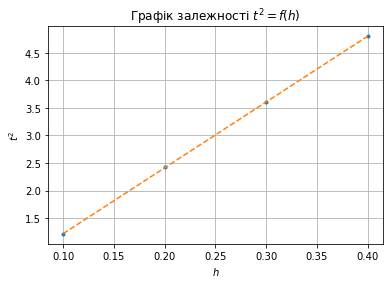

In [23]:
import numpy as np
import matplotlib.pyplot as plt

f = plt.figure()

pol = np.polyfit(heightData, arrY, 1)
pol_graph = np.polyval(pol, heightData)
plt.plot(heightData, arrY, '.')
plt.plot(heightData, pol_graph, '--')


plt.title('Графік залежності $t^2 = f(h)$')
plt.ylabel('$t^2$')
plt.xlabel('$h$')


plt.grid()
plt.show()
f.savefig("graph.pdf", bbox_inches='tight')

In [24]:
maxTime = max(arrY)
minTime = min(arrY)
timeDelta = maxTime - minTime
timeDelta

3.583899

In [25]:
maxFunc = max(heightData)
minFunc = min(heightData)
funcDelta = maxFunc - minFunc
funcDelta

0.30000000000000004

In [26]:
K_alpha = (timeDelta)/(funcDelta)
K_alpha

11.94633

In [27]:
# Визначаємо момент інерції за допомогою експерименту! Не аналітично.
inertia_moment_K_alpha = 0.5 * K_alpha * (mass * g_const * (radius ** 2))
inertia_moment_K_alpha

0.0008789512297499999

In [28]:
intertia_moment_symmetric = inertia_moment_K_alpha - (mass * (radius ** 2))
intertia_moment_symmetric

0.0008639512297499999

In [36]:
from statistics import mean

time_mse = []
time_relative_error = []
for timeStamps in timeData:
    time_mse.append(getMSE(timeStamps))
    time_relative_error.append(getRelativeError(timeStamps))
time_relative_error_separate = time_relative_error
time_relative_error = mean(getMean(time_relative_error))

In [37]:
time_mse

[0.010148891565092192,
 0.00602771377334175,
 0.0400374824383352,
 0.004041451884327375]

In [38]:
time_relative_error

0.011940096210652331

In [39]:
time_relative_error_separate

[[0.011807447774750138, 0.006357856494096181, 0.018165304268846518],
 [0.007717041800643094, 0.004501607717041876, 0.0032154340836013607],
 [0.04210526315789478, 0.022631578947368385, 0.019473684210526275],
 [0.0036529680365296837, 0.0022831050228310015, 0.0013698630136986822]]